### Score: `[29]`

Q1. `[11]` Great job!

Q2. `[9+9]` 缺少坐标轴标题

各题批注用`### Note`给出，请自行查阅。

In [1]:
# Assignment 04 by Yang Yi 12432892
import netCDF4
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
%matplotlib inline

In [2]:
# 1.Global Earthquakes
data = pd.read_csv("usgs_earthquakes.csv")
data.head()

time   latitude  longitude  depth   mag magType  nst  \
0  2014-01-31 23:53:37.000  60.252000  -152.7081  90.20  1.10      ml  NaN   
1  2014-01-31 23:48:35.452  37.070300  -115.1309   0.00  1.33      ml  4.0   
2  2014-01-31 23:47:24.000  64.671700  -149.2528   7.10  1.30      ml  NaN   
3  2014-01-31 23:30:54.000  63.188700  -148.9575  96.50  0.80      ml  NaN   
4  2014-01-31 23:30:52.210  32.616833  -115.6925  10.59  1.34      ml  6.0   

      gap     dmin     rms net          id                   updated  \
0     NaN      NaN  0.2900  ak  ak11155107  2014-02-05T19:34:41.515Z   
1  171.43  0.34200  0.0247  nn  nn00436847  2014-02-01T01:35:09.000Z   
2     NaN      NaN  1.0000  ak  ak11151142  2014-02-01T00:03:53.010Z   
3     NaN      NaN  1.0700  ak  ak11151135  2014-01-31T23:41:25.007Z   
4  285.00  0.04321  0.2000  ci  ci37171541  2014-02-01T00:13:20.107Z   

                               place        type  
0  26km S of Redoubt Volcano, Alaska  earthquake  
1            32km S of Alamo, Nevada  earthquake  
2   12km NNW of North Nenana, Alaska  earthquake  
3         22km S of Cantwell, Alaska  earthquake  
4       10km WNW of Progreso, Mexico  earthquake

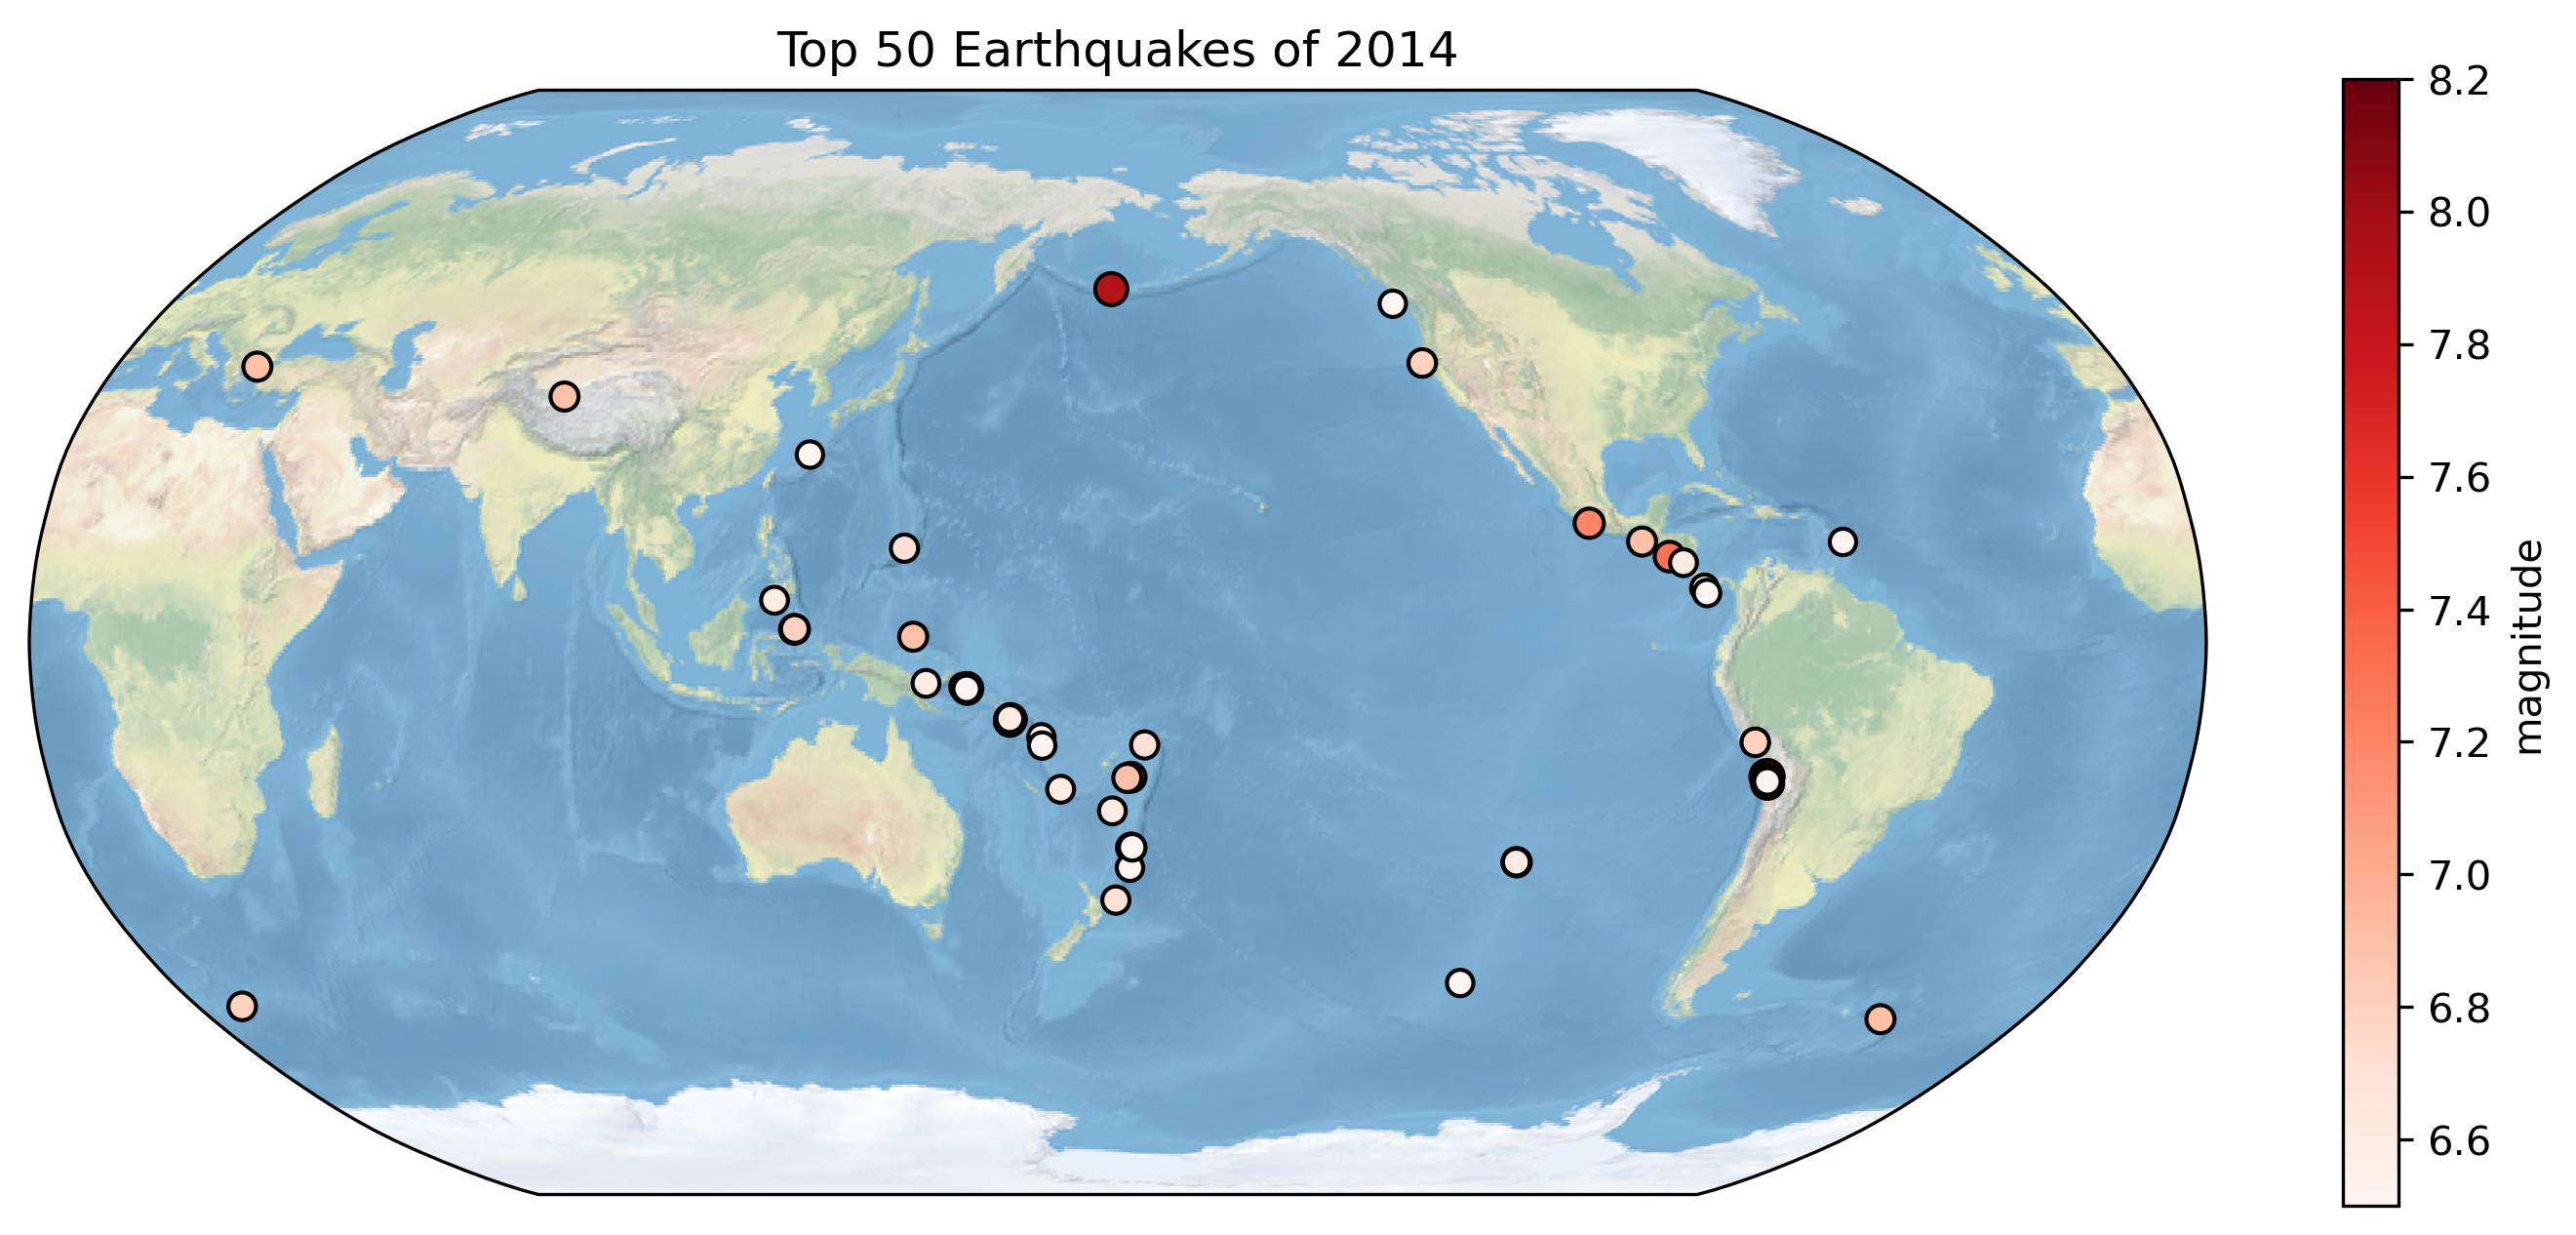

In [4]:
# 本题从我的师姐龙师倩处得到启发
# 设置画布大小和分辨率
plt.figure(figsize=(12, 10),dpi=300)
# 创建投影的地图对象
proj = ccrs.Robinson(central_longitude=180, globe=None)
ax = plt.axes(projection=proj)
ax.stock_img()
# 设置地图为全球视图
ax.set_global()

top_50_earthquakes = data.nlargest(50, 'mag')
lons = top_50_earthquakes['longitude'].values
lats = top_50_earthquakes['latitude'].values
magnitudes = top_50_earthquakes['mag'].values

# 在地图上绘制散点图
sc = ax.scatter(lons, lats, s=magnitudes**2, c=magnitudes, edgecolor='black', cmap='Reds', transform=ccrs.PlateCarree())

plt.colorbar(sc, label='magnitude', shrink=0.5)
plt.title('Top 50 Earthquakes of 2014')
plt.show()

In [7]:
# 2.Explore a netCDF dataset
# 本题我使用了Assignment 03中的文件
import xarray as xr
import glob
# 定义文件路径
file='D:\\ESE5023-Assignments-12432892\\output_file\\*.nc4'
# 获取所有文件路径
files=glob.glob(file)
# 合并多个文件
CO2=xr.open_mfdataset(files,combine='by_coords')
# 查看合并后的文档
CO2

<xarray.Dataset>
Dimensions:   (lat: 361, lon: 576, time: 86)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 2015-01-16T12:00:00 ... 2022-02-15
Data variables:
    XCO2      (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    XCO2PREC  (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
Attributes: (12/25)
    RangeBeginningDate:             2017-08-01
    RangeBeginningTime:             00:00:00.000000
    RangeEndingDate:                2017-08-01
    RangeEndingTime:                23:59:99.999999
    SpatialCoverage:                global
    SouthBoundingCoordinate:        -90.0
    ...                             ...
    ProductionDateTime:             2022-03-15T12:04:33Z
    History:                        Original file generated: Tue Mar 15 12:04...
    ShortName:                      OCO2_GEOS_L3CO2_MONTH_10r
    LongName:                       OCO-2 GEOS Level 3 monthly, 0.5x0.625 ass...
    Title:                          OCO-2 GEOS Level 3 monthly, 0.5x0.625 ass...
    IdentifierProductDOI:           10.5067/BGFIODET3HZ8

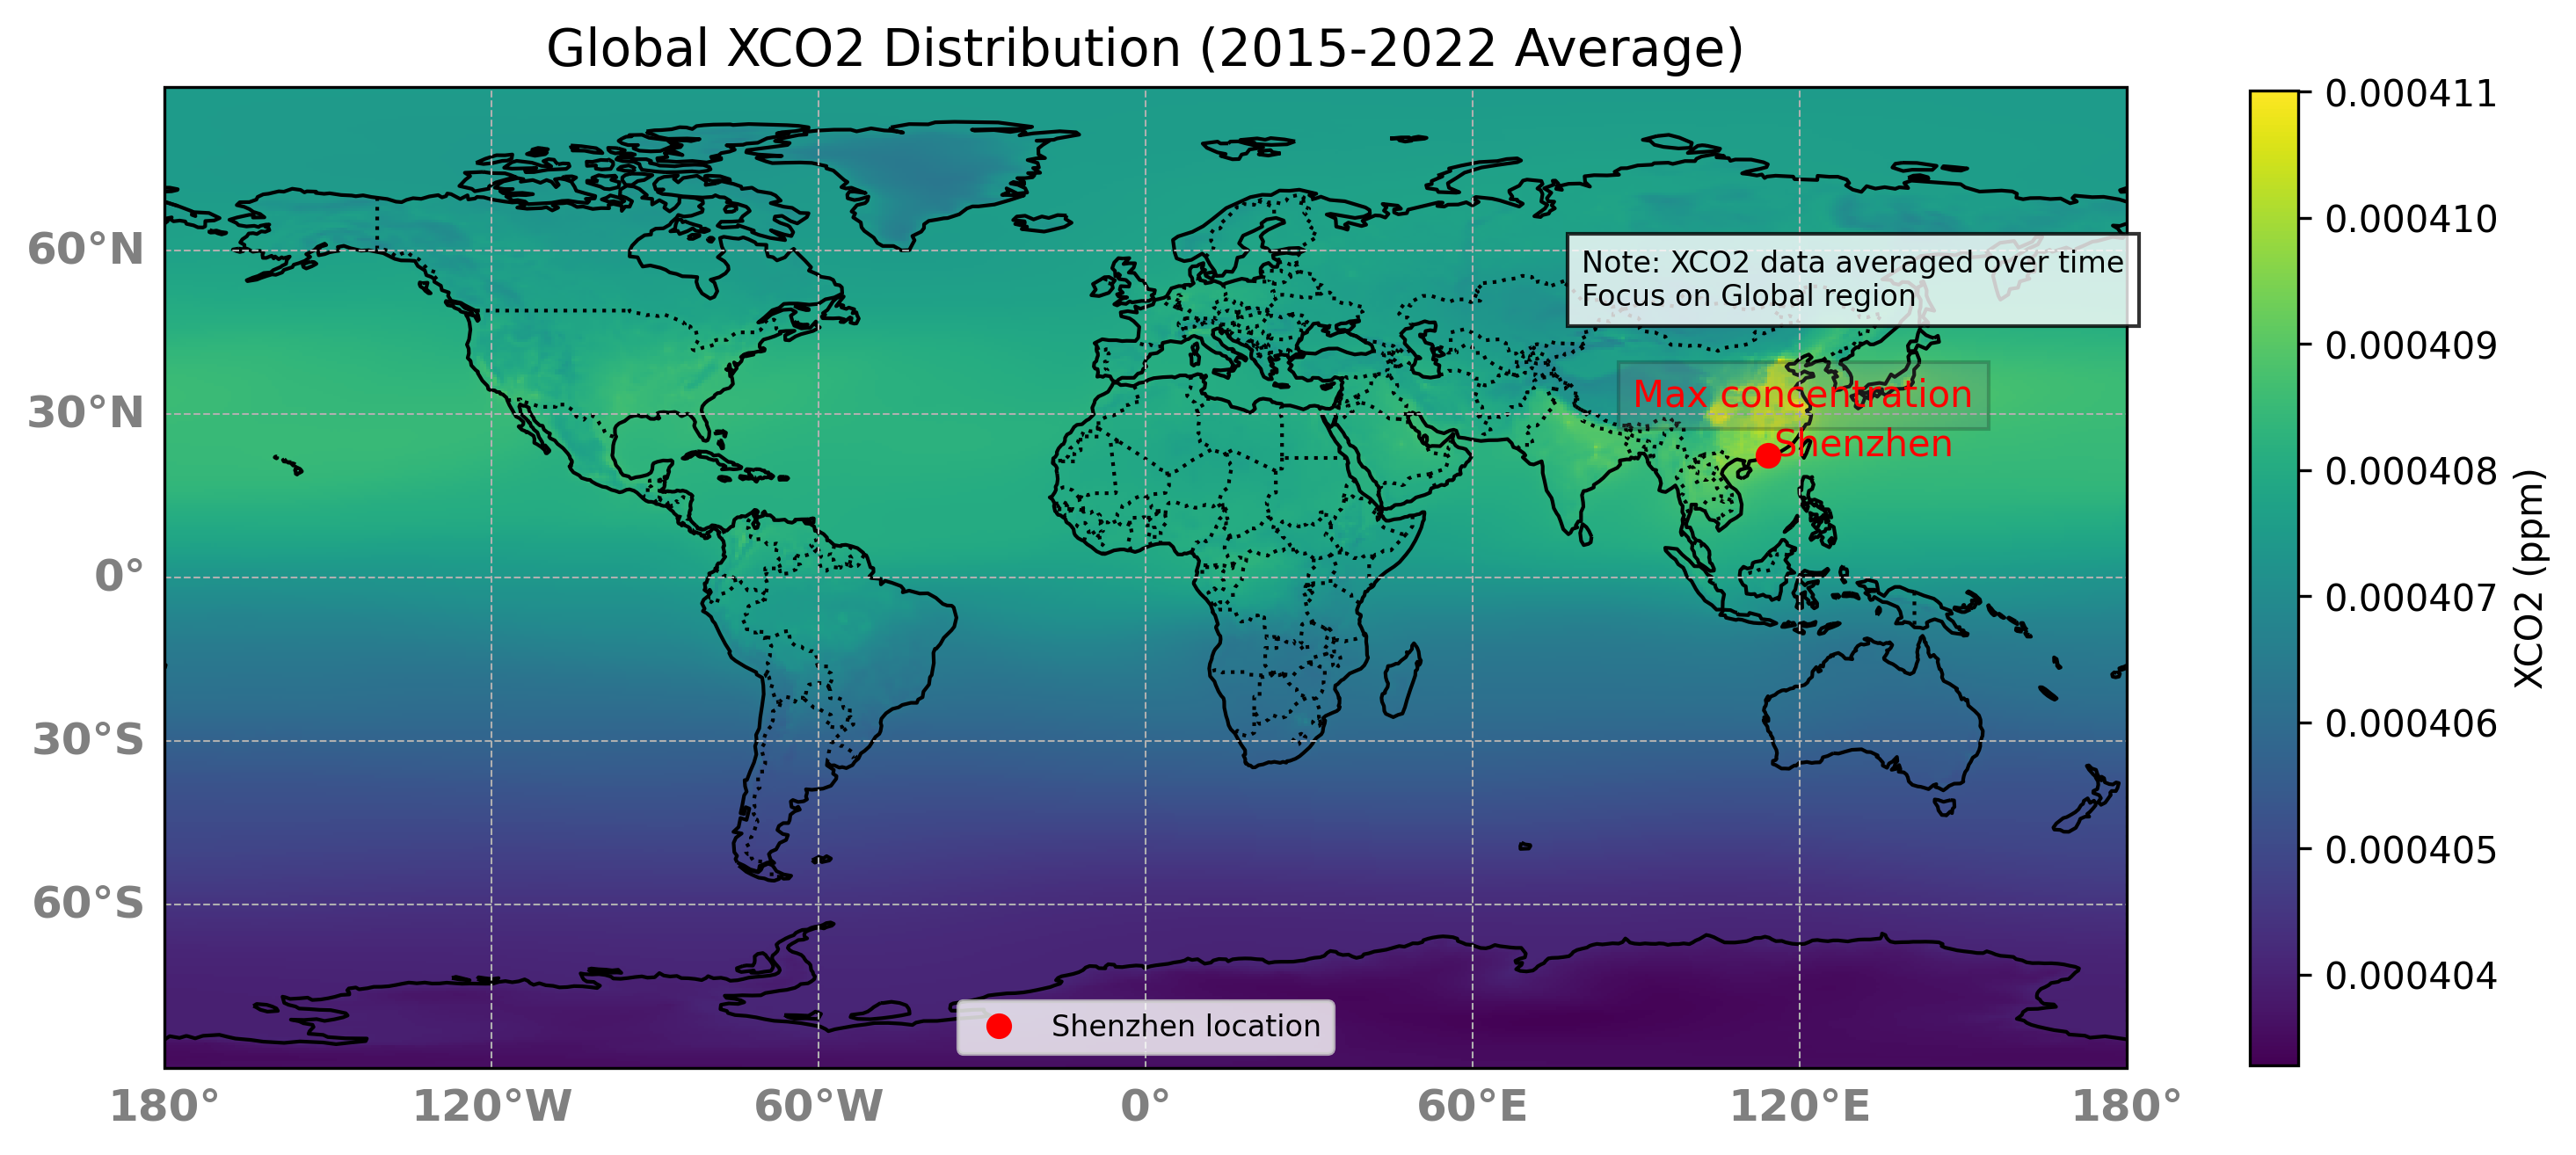

In [17]:
# 2.1 绘制全局地图
# 加载数据集
file = 'D:\\ESE5023-Assignments-12432892\\output_file\\*.nc4'
CO2 = xr.open_mfdataset(file, combine='by_coords')

# 提取变量
xco2 = CO2['XCO2'].mean(dim='time')  # 对时间维度取平均值
lats = CO2['lat'].values
lons = CO2['lon'].values

# 找到 XCO2 最大值的位置
xco2_numpy = xco2.values  # 转换为 NumPy 数组
max_idx = np.unravel_index(np.argmax(xco2_numpy), xco2_numpy.shape)
max_lat = lats[max_idx[0]]
max_lon = lons[max_idx[1]]

# 创建绘图
plt.figure(figsize=(12, 6), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())  # PlateCarree 是等矩形投影
ax.set_global()

# 添加地理特征
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 添加网格线和坐标标签
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5)
gl.top_labels = False  # 关闭顶部标签
gl.right_labels = False  # 关闭右侧标签
gl.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}

# 添加 X 和 Y 轴标签
ax.set_xlabel("Longitude (°)", fontsize=12, weight='bold')
ax.set_ylabel("Latitude (°)", fontsize=12, weight='bold')

# 标注深圳的位置 (纬度：22.5°N，经度：114.1°E)
shenzhen_lat, shenzhen_lon = 22.5, 114.1
ax.plot(shenzhen_lon, shenzhen_lat, 'ro', markersize=6, transform=ccrs.PlateCarree())
ax.text(shenzhen_lon + 1, shenzhen_lat, "Shenzhen", color='red', fontsize=10, transform=ccrs.PlateCarree())

# 绘制数据
mesh = ax.pcolormesh(lons, lats, xco2, transform=ccrs.PlateCarree(), cmap='viridis')

# 添加颜色条
cbar = plt.colorbar(mesh, orientation='vertical', pad=0.05, shrink=0.8)
cbar.set_label('XCO2 (ppm)')

# 添加标题
plt.title("Global XCO2 Distribution (2015-2022 Average)", fontsize=14)

# 添加文本框
plt.text(80, 50, "Note: XCO2 data averaged over time\nFocus on Global region", 
         bbox=dict(facecolor='white', alpha=0.8), fontsize=8)

# 在图中 XCO2 浓度最大处添加注释“Max concentration”
ax.text(max_lon, max_lat, 'Max concentration', size=10,
        horizontalalignment='center', color='red',
        bbox=dict(facecolor="grey", alpha=0.2),
        transform=ccrs.PlateCarree())

#添加图例
plt.legend(['Shenzhen location'],loc='best',fontsize=8)

# 显示图像
plt.show()

### Note: 缺少x轴和y轴的经纬度坐标轴标题，以下同理

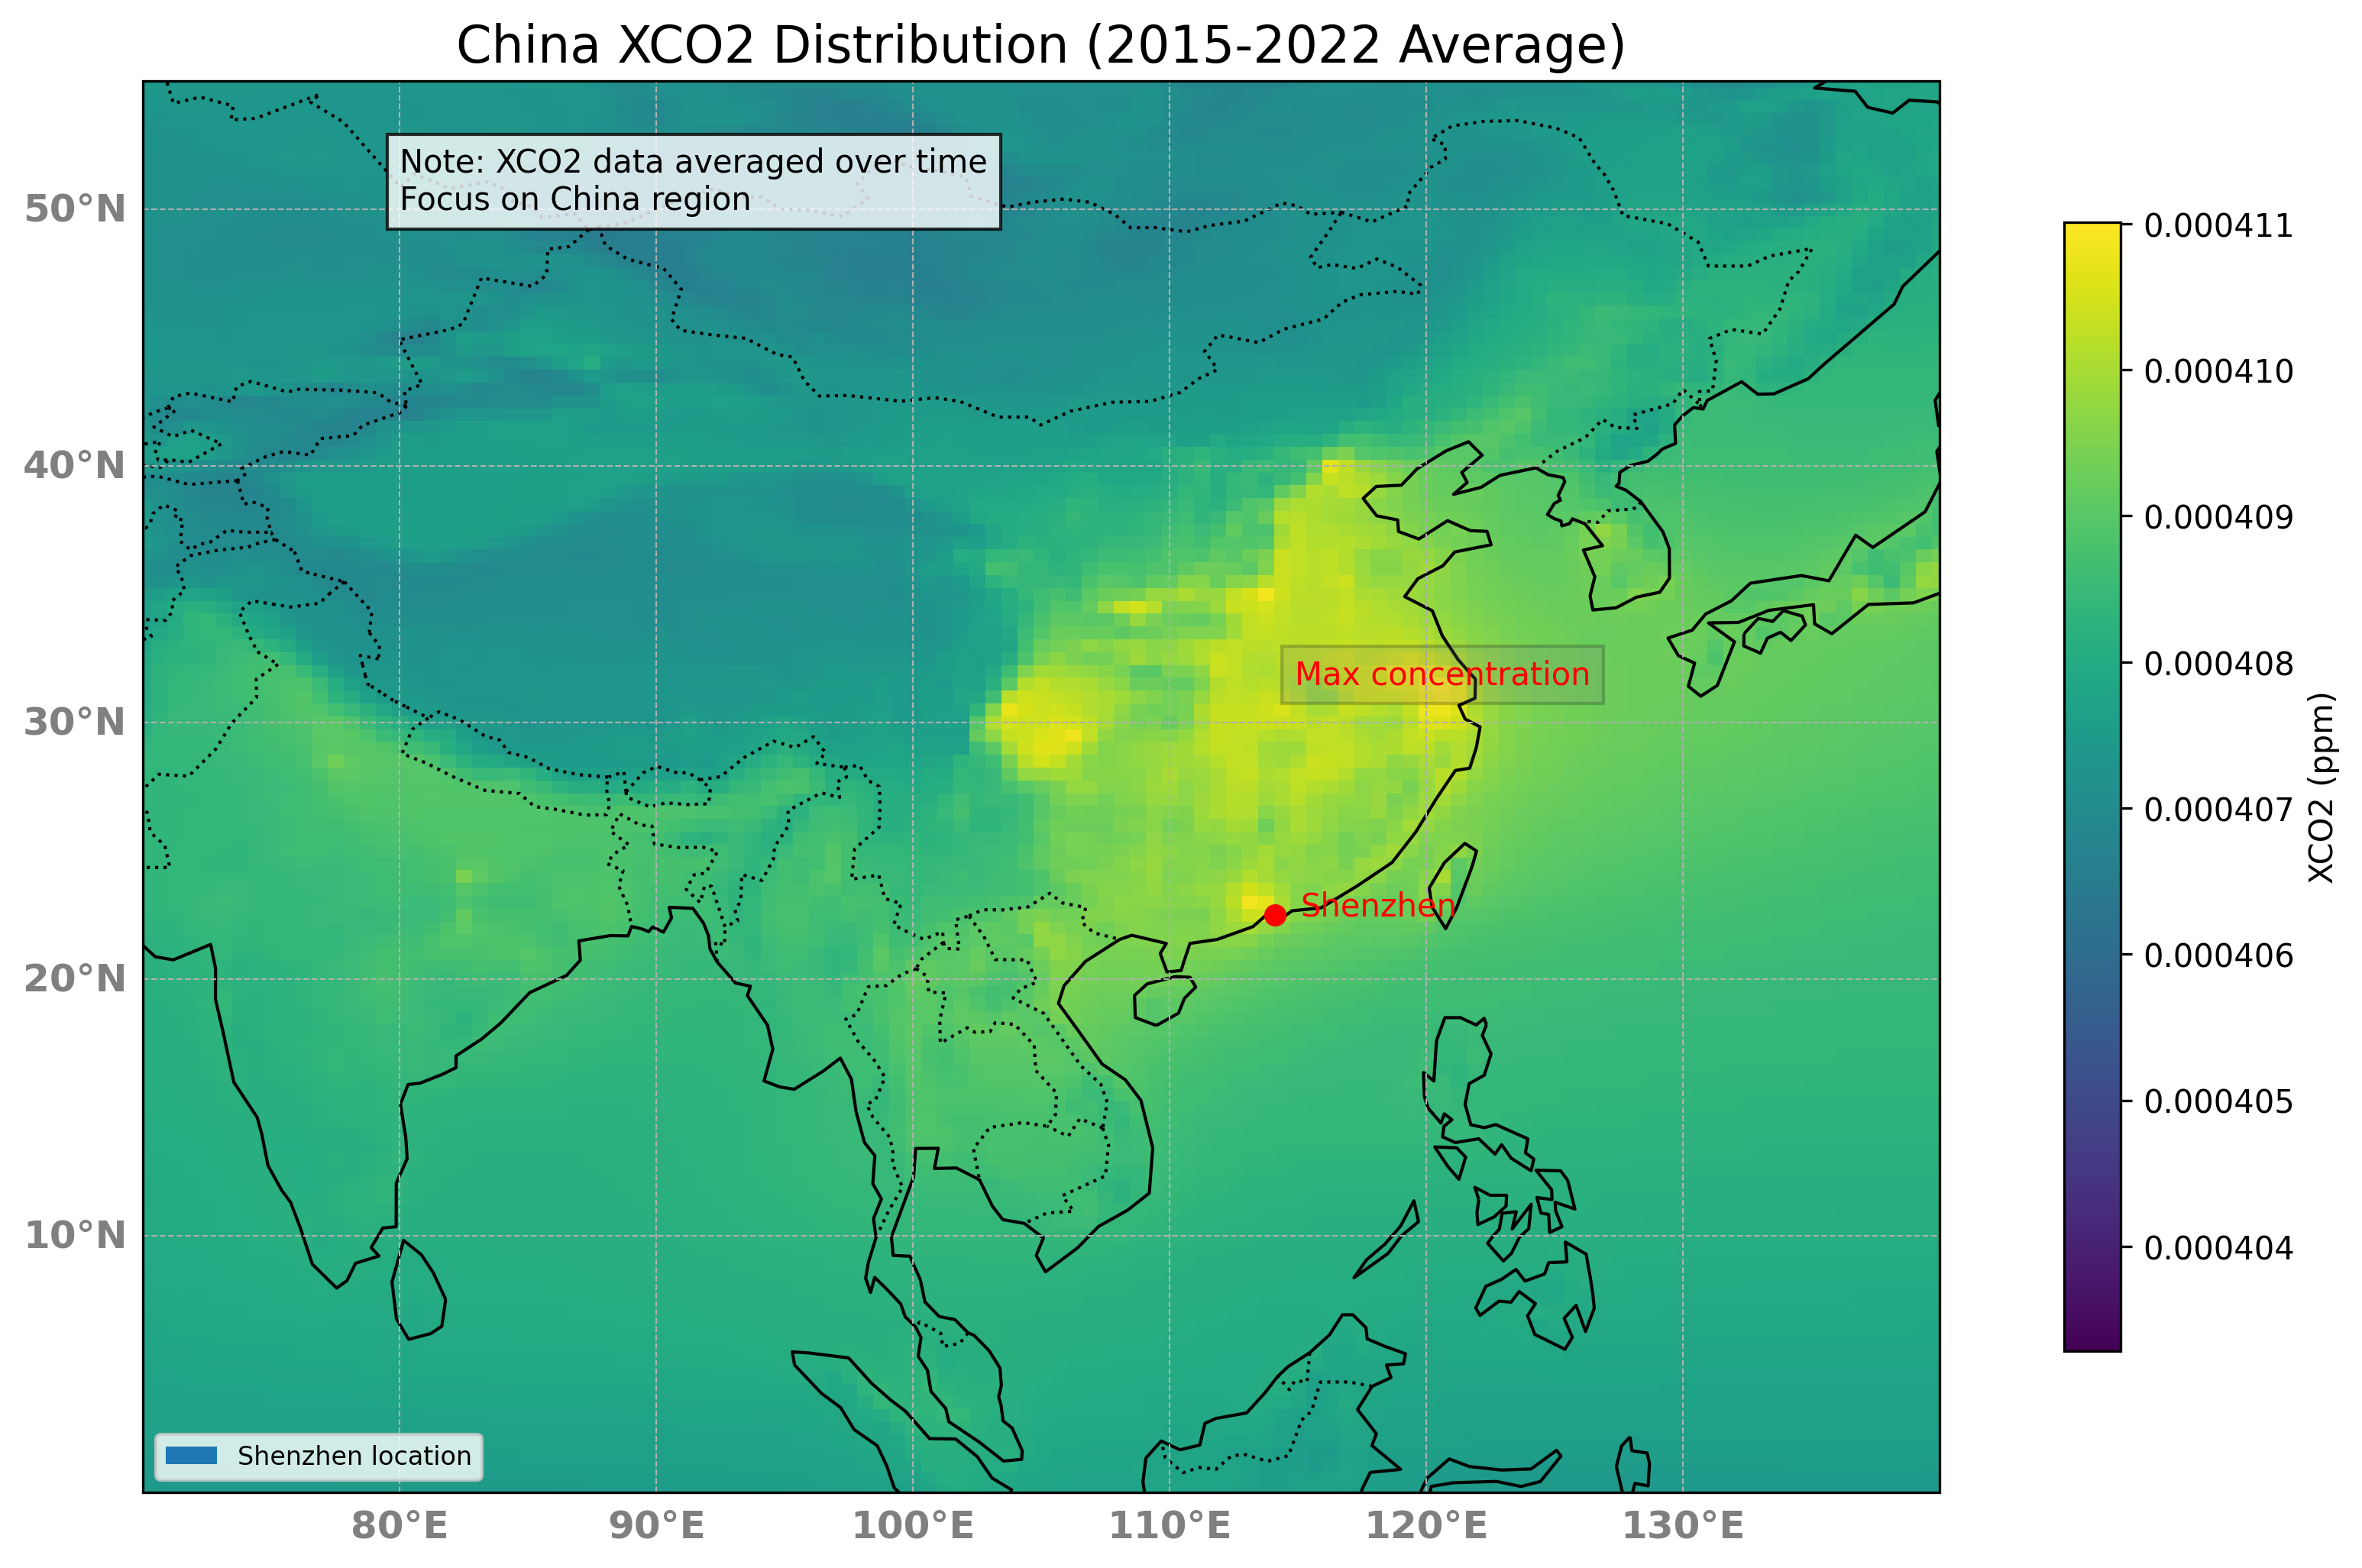

In [11]:
# 2.2 绘制聚焦中国的区域地图
# 加载数据集
file = 'D:\\ESE5023-Assignments-12432892\\output_file\\*.nc4'
CO2 = xr.open_mfdataset(file, combine='by_coords')

# 提取变量
xco2 = CO2['XCO2'].mean(dim='time')  # 对时间维度取平均值
lats = CO2['lat'].values
lons = CO2['lon'].values

# 找到 XCO2 最大值的位置
xco2_numpy = xco2.values  # 转换为 NumPy 数组
max_idx = np.unravel_index(np.argmax(xco2_numpy), xco2_numpy.shape)
max_lat = lats[max_idx[0]]
max_lon = lons[max_idx[1]]

# 创建绘图
plt.figure(figsize=(14, 8), dpi=300)
ax = plt.axes(projection=ccrs.PlateCarree())  # 使用 PlateCarree 投影
ax.set_extent([70, 140, 0, 55], crs=ccrs.PlateCarree())  # 聚焦中国地区

# 添加地理特征
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 添加网格线和坐标标签
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5)
gl.top_labels = False  # 关闭顶部标签
gl.right_labels = False  # 关闭右侧标签
gl.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}

# 添加 X 和 Y 轴标签
ax.set_xlabel("Longitude (°)", fontsize=12, weight='bold')
ax.set_ylabel("Latitude (°)", fontsize=12, weight='bold')

# 绘制 XCO2 数据
mesh = ax.pcolormesh(lons, lats, xco2, transform=ccrs.PlateCarree(), cmap='viridis')

# 添加颜色条
cbar = plt.colorbar(mesh, orientation='vertical', pad=0.05, shrink=0.8)
cbar.set_label('XCO2 (ppm)')  # 替换为实际单位

# 标注深圳的位置 (纬度：22.5°N，经度：114.1°E)
shenzhen_lat, shenzhen_lon = 22.5, 114.1
ax.plot(shenzhen_lon, shenzhen_lat, 'ro', markersize=6, transform=ccrs.PlateCarree())
ax.text(shenzhen_lon + 1, shenzhen_lat, "Shenzhen", color='red', fontsize=10, transform=ccrs.PlateCarree())

# 添加标题
plt.title("China XCO2 Distribution (2015-2022 Average)", fontsize=16)

# 添加文本框
plt.text(80, 50, "Note: XCO2 data averaged over time\nFocus on China region", 
         bbox=dict(facecolor='white', alpha=0.8), fontsize=10)

# 在图中 XCO2 浓度最大处添加注释“Max concentration”
ax.text(max_lon, max_lat, 'Max concentration', size=10,
        horizontalalignment='center', color='red',
        bbox=dict(facecolor="grey", alpha=0.2),
        transform=ccrs.PlateCarree())

#添加图例
plt.legend(['Shenzhen location'],loc='best',fontsize=8)

# 显示图像
plt.show()

2.1和2.2可能由于cartopy和我的python有些地方不兼容的问题，所以我虽然写了x轴和y轴标签的代码，但是图中并没有显现，希望助教能看到我写了代码,谢谢~
代码如下：
# 添加 X 和 Y 轴标签
ax.set_xlabel("Longitude (°)", fontsize=12, weight='bold')
ax.set_ylabel("Latitude (°)", fontsize=12, weight='bold')